Script Práctica 2 Parte 1 (MLP)

Redes de Neuronas Artificiales, curso 2023-2024

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt



Para trabajar con un repositorio almacenado en drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#!ls

#%cd "/content/drive/MyDrive/RN/Practica1/parte1"

#!ls

Mounted at /content/drive/


In [ ]:
# leer best model
pathSavedModel = path+"bestmodel"+"/"
bestModel = tf.keras.models.load_model(pathSavedModel)
bestModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1100      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestModel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1100      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1100      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


# Cargar los datos

* Hay que ajustar el path a los csv de datos
* Cambiar parámetros correspondientes si el delimitador no es una coma, o si el archivo contiene cabeceras
* Pueden cargarse numpy arrays o dataframes, en este caso se van a utilizar arrays

In [ ]:
path = "path"
inputFilename = "datos.csv"
Data_set = pd.read_csv(path+inputFilename, header='infer', delimiter=',')
# SEPARACIÓN ENTRADA Y SALIDAA
y_Data_set = Data_set.iloc[:,-1:]
X_Data_set = Data_set.iloc[: , :-1]

# mediante prints es posible COMPROBAR DIMENSIONES DE LOS DATOS para comprobar que todo se haya cargado correctamente
print('Entrada(X_Data_set): ',X_Data_set.shape)
print('Salida(y_Data_set): ',y_Data_set.shape)

Entrada(X_Data_set):  (2126, 21)
Salida(y_Data_set):  (2126, 1)


# Preparación de datos y partir train-test
Igual que en la práctica 1:
* Normalizar
* Aleatorización

Posibles mejoras:
* Balanceo
* Ruido
* Learning rate
* Número de ciclos



Despues de generar el dataset es posible guardarlo, para cargarlo en un futuro

In [ ]:
# save to CSV file
X_train['class'] = y_train # add the class to the file
pd.DataFrame(np.asarray(X_train)).to_csv(path+"train.csv", header=Data_set.columns) # store it with the headers

X_test['class'] = y_test
pd.DataFrame(np.asarray(X_test)).to_csv(path+"test.csv", header=Data_set.columns)

In [ ]:
# Load CSV file
train_set = pd.read_csv(path+"train.csv", header='infer', delimiter=',')
test_set  = pd.read_csv(path+"test.csv", header='infer', delimiter=',')
y_train = train_set.iloc[:,-1:]
X_train = train_set.iloc[: , :-1]
y_test  = test_set.iloc[:,-1:]
X_test  = test_set.iloc[: , :-1]

[('NSP', 1)]
[('NSP', 1)]


# Uso de semillas para hacer los procesos aleatorios replciables entre ejecuciones

In [ ]:
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
semilla=2023 # segun la semilla, el futuro aleatorio funcionara siempre igual
seed(semilla)
set_random_seed(semilla)

# Comienzo código

In [ ]:
# CONVERTIR TARGET A CATEGORICAL
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_transformed = encoder.fit_transform(y_train)
y_test_transformed = encoder.fit_transform(y_test)
print("Entrenamiento salida sin transformar")
print(y_train[:11])
print("Entrenamiento salida transformada")
print(y_train_transformed[:11])
# COMPROBAR DIMENSIONES DE LOS DATOS
print("Entrenamiento input")
print(X_train.shape)
print("Entrenamiento output")
print(y_train.shape)
print("Entrenamiento output transformado")
print(y_train_transformed.shape)
print("Test input")
print(X_test.shape)
print("Test output")
print(y_test.shape)
print("Test output transformado")
print(y_test_transformed.shape)

Entrenamiento salida sin transformar
    NSP
0   2.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   2.0
7   1.0
8   3.0
9   1.0
10  2.0
Entrenamiento salida transformada
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
Entrenamiento input
(1424, 22)
Entrenamiento output
(1424, 1)
Entrenamiento output transformado
(1424, 3)
Test input
(702, 22)
Test output
(702, 1)
Test output transformado
(702, 3)


In [ ]:
#Extraer del conjunto de train el conjunto de validación
from sklearn.model_selection import train_test_split
X_train2, X_Validation, y_train_transformed2, y_Validation = train_test_split(X_train, y_train_transformed, stratify=y_train_transformed, test_size=0.2)

In [ ]:
############## Undersampling





####### Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_Validation, y_Validation)
from collections import Counter

# y_Validation
cnt = [0, 0, 0]
for entry in y_Validation:
    if   np.array_equal(entry, [0, 0, 1]):
        #print(1)
        cnt[0] = cnt[0] + 1
    elif np.array_equal(entry, [0, 1, 0]):
        #print(2)
        cnt[1] = cnt[1] + 1
    elif np.array_equal(entry, [1, 0, 0]):
        #print(3)
        cnt[2] = cnt[2] + 1
print("y_Validation distribution: "+str(cnt))

# y_resampled
cnt = [0, 0, 0]
for entry in y_resampled:
    if   np.array_equal(entry, [0, 0, 1]):
        #print(1)
        cnt[0] = cnt[0] + 1
    elif np.array_equal(entry, [0, 1, 0]):
        #print(2)
        cnt[1] = cnt[1] + 1
    elif np.array_equal(entry, [1, 0, 0]):
        #print(3)
        cnt[2] = cnt[2] + 1
print("y_resampled distribution: "+str(cnt))

y_Validation distribution: [23, 40, 222]
y_resampled distribution: [222, 222, 222]


# Criterios de parada

In [ ]:
#OPCIÓN 1
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1)
    #min_delta=1,
    #mode='min')
callbacks_list=[early_stopping]

In [ ]:
#OPCIÓN 2
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    path+'bestmodel', monitor='val_loss',
    #mode='min',
    verbose=1,
    save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
# ASIGNAR PESOS Y DEFINIR UN DICCIONARIO
peso_claseN = 1.
peso_claseS = 5.  # Trata cada instancia de clase 1 como 5 instancias de clase 0
peso_claseP = 10. # Trata cada instancia de clase 2 como 10 instancias de clase 0
class_weight = { # Diccionaro de pesos
    0: peso_claseN,
    1: peso_claseS,
    2: peso_claseP
}

In [ ]:
#ASIGNAR PESOS DE MANERA AUTOMÁTICA,
from sklearn.utils import class_weight

pesos = class_weight.compute_class_weight( # total/numclasses*repeticiones de la clase
    'balanced',
    classes = np.unique(y_train),
    y       = y_train.NSP.to_numpy()
)
print(pesos)

#CREACIÓN DEL DICCIONARIO
class_weight = {
    0: int(pesos[0]+1),
    1: int(pesos[1]*10),
    2: int(pesos[2]*10)
}

print(class_weight)

[0.42839952 2.3973064  4.02259887]
{0: 1, 1: 23, 2: 40}


# Definir el modelo de red neuronal

In [ ]:
# Definir forma de la entrada de la red
input_shape=(X_train.shape [1],) # utilizamos los datos de entrenamiento para definir la tupla
# Definir la salida de la red, la ultima capa debera tener una neurona por cada clase
num_clases =y_test_transformed.shape [1] # definimos el numero de clases que queremos que tenga la salida
# imprimir información de la red
print(num_clases)
print(train_set.NSP.value_counts())
print(test_set.NSP.value_counts())

3
1.0    1108
2.0     198
3.0     118
Name: NSP, dtype: int64
1.0    547
2.0     97
3.0     58
Name: NSP, dtype: int64


In [ ]:
#DEFINICIÓN DEL MODELO
model = Sequential()
# Capa de entrada del modelo
model.add(Dense(50, input_shape=input_shape, activation='sigmoid'))
# Capas intermedias del modelo

# Capa de salida del modelo
model.add(Dense(num_clases, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Hiperparametros
lr = 0.2 # razon de aprendizaje
momento=0
epochs = 300 # numero de ciclos que se quiere realizar en el entrenamiento
batch_size=32
optimizador=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momento)
#lr=1e-3
#optimizador=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
#rho=0.9
#lr=0.001
#optimizador=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),

In [ ]:
#COMPILACIÓN DEL MODELO
from keras.losses import binary_crossentropy

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse']
)

In [ ]:
#ENTRENAMIENTO DEL MODELO
opcion=2
if opcion==1:
  callbacks_list=[early_stopping]

historico = model.fit(X_train2, y_train_transformed2,
                      epochs=100, batch_size=1, verbose=1, validation_data=(X_Validation,y_Validation), shuffle=False,
                      callbacks=callbacks_list,
                      class_weight=class_weight)

# Análisis

In [ ]:
#GUARDAR RESULTADOS Y MODELOS EN FICHEROS
#CUANDO SE UTILIZA CHECKPOINT, YA ESTÁ GUARDADO EL MODELO
#CUANDO SE UTILIZA EARLY_STOPING, REALEMNTE EL MODELO YA ESTÁ EN "MODEL", PERO SI SE QUIERE GUARDAR EN FICHERO SE DEBE UTILIZAR MODEL.SAVE

np.savetxt(path+'historicoTrainLoss.txt',historico.history['loss'])
np.savetxt(path+'historicoValLoss.txt',historico.history['val_loss'])
np.savetxt(path+'historicoTrainAcc.txt',historico.history['accuracy'])
np.savetxt(path+'historicoValAcc.txt',historico.history['val_accuracy'])

if opcion==1:
    model.save(path+'model_early_stoping')

In [ ]:
#LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA EARLY_STOPPING
final_epoch = len(historico.history['loss'])
print(historico.history['loss'][final_epoch-1])
print(historico.history['val_loss'][final_epoch-1])
print(historico.history['accuracy'][final_epoch-1])
print(historico.history['val_accuracy'][final_epoch-1])

2.6456000804901123
0.6128659248352051
0.08340650051832199
0.08070175349712372


In [ ]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT
epochs_stop = np.where(historico.history['val_loss'] == np.min(historico.history['val_loss']))
final_epoch = epochs_stop[0][0]
print(final_epoch)
print(historico.history['loss'][final_epoch-1])
print(historico.history['val_loss'][final_epoch-1])
print(historico.history['accuracy'][final_epoch-1])
print(historico.history['val_accuracy'][final_epoch-1])

0
2.6456000804901123
0.6128659248352051
0.08340650051832199
0.08070175349712372


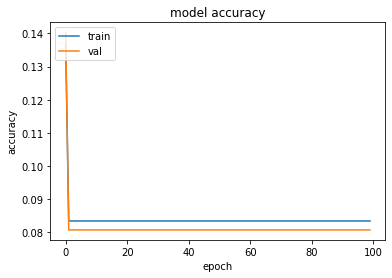

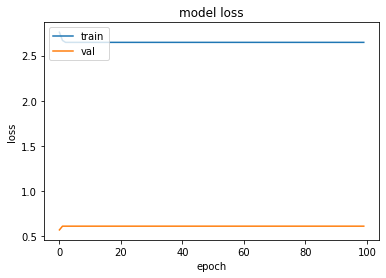

In [ ]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Modelo final

In [ ]:
# DEFINIR Y ENTRENAR EL MODELO DEFINITIVO, CON LOS MEJORES HIPERPARÁMETROS
# ejemplo:
num_neuronas = 50
lr           = 0.1
momento      = 0
epochs       = 40
class_weight = {
    0: 1.,
    1: 5.,
    2: 10.
}

#definir modelo
final_model = Sequential()
final_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))
final_model.add(Dense(num_clases, activation='softmax'))

#COMPILAR
final_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse', 'binary_crossentropy']
)

#ENTRENAR
historico=final_model.fit(
    X_train, y_train_transformed, epochs=epochs,
    batch_size=1, verbose=1, validation_split=0, shuffle=False, class_weight=class_weight
)

Epoch 1/40
1424/1424 [==============================] - 4s 2ms/step - loss: 0.9413 - accuracy: 0.1447 - mse: 0.5533 - binary_crossentropy: 2.3188
Epoch 2/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.9543 - accuracy: 0.1018 - mse: 0.5809 - binary_crossentropy: 2.2363
Epoch 3/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.9036 - accuracy: 0.1721 - mse: 0.5066 - binary_crossentropy: 1.8337
Epoch 4/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.9775 - accuracy: 0.0899 - mse: 0.5944 - binary_crossentropy: 2.2998
Epoch 5/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.8972 - accuracy: 0.1531 - mse: 0.5074 - binary_crossentropy: 1.6608
Epoch 6/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.8512 - accuracy: 0.2029 - mse: 0.4406 - binary_crossentropy: 1.2838
Epoch 7/40
1424/1424 [==============================] - 3s 2ms/step - loss: 0.8343 - accuracy: 0.2247 - mse: 0.4249 - binary

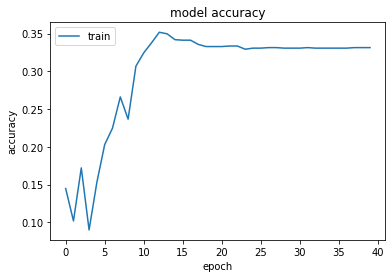

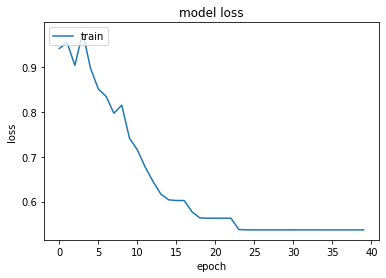

In [ ]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(historico.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# EVALUAR MODELO
train_results = final_model.evaluate(X_train, y_train_transformed, verbose=1)
test_results = final_model.evaluate(X_test, y_test_transformed, verbose=1)

#EL INDICE 0 ES EL LOSS, EL RESTO LAS MÉTRICAS DEFINADAS ARRIBA. EN EST CASO 'accuracy':1,'mse':2
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]} - MSE: {train_results[2]} ')
print(f'Test results  - Loss: {test_results[0]}  - Accuracy: {test_results[1]} - MSE: {test_results[2]} ')

22/22 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.7607 - mse: 0.1813 - binary_crossentropy: 0.6285
Train results - Loss: 0.1803152710199356 - Accuracy: 0.771769642829895 - MSE: 0.1803152710199356 
Test results  - Loss: 0.1812891960144043  - Accuracy: 0.7606837749481201 - MSE: 0.1812891960144043 


In [ ]:
# PREDICCIONES EN BRUTO
raw_testPred = final_model.predict(X_test)
#prediccion de los 5 primeros patrones de test: 5 vectores con valores reales
print(raw_testPred[:5])

# PREDICCIONES DE LAS CLASES
testPred = np.argmax(raw_testPred, axis=1)
#transformar el núm de col en la etiqueta
class_testPred = encoder.classes_[testPred]
print(class_testPred[:5])

#MATRIZ DE CONFUSIÓN Y OTRAS MÉTRICAS COMO RECALL
cm=confusion_matrix(y_test, class_testPred)
print(cm)
print('Classification Report')
print(classification_report(y_test, class_testPred))

22/22 [==============================] - 0s 2ms/step
[[0.17915618 0.7614531  0.05939076]
 [0.25435612 0.6396842  0.10595976]
 [0.2773513  0.5538185  0.16883011]
 [0.3014851  0.47276515 0.22574973]
 [0.3243039  0.41326642 0.26242954]]
[2. 2. 2. 2. 2.]
[[532  15   0]
 [ 95   2   0]
 [ 57   1   0]]
Classification Report
              precision    recall  f1-score   support

         1.0       0.78      0.97      0.86       547
         2.0       0.11      0.02      0.03        97
         3.0       0.00      0.00      0.00        58

    accuracy                           0.76       702
   macro avg       0.30      0.33      0.30       702
weighted avg       0.62      0.76      0.68       702



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modelo final